In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5) 

import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
digits = load_digits()
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage

1.0


The variance for the accuracy for 100 draws: 0.0007250912937121169


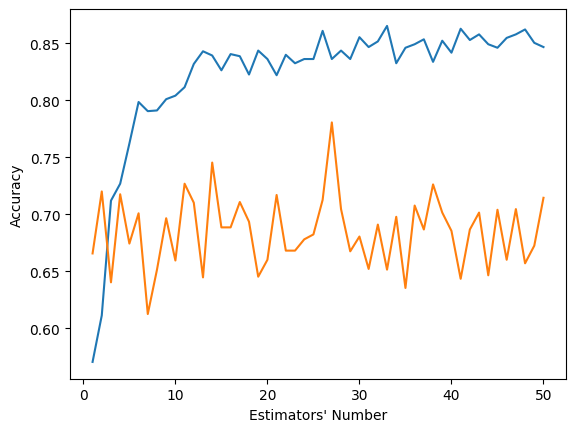

In [10]:
import matplotlib.pyplot as plt

accuracies = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracies.append(accuracy)

acc_var = np.var(accuracies)
print(f"The variance for the accuracy for 100 draws: {acc_var}")

n_estimators_values = range(1, 51)

accuracies1 = []

for n_estimators in n_estimators_values:
    bagging = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=n_estimators)
    bagging.fit(X_train, y_train)
    accuracy = bagging.score(X_test, y_test)
    accuracies1.append(accuracy)


plt.plot(n_estimators_values, accuracies1)
plt.plot(n_estimators_values, accuracies[1:51])
plt.xlabel("Estimators' Number")
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

bagging = BaggingClassifier(tree.DecisionTreeClassifier())

grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best params :", grid_search.best_params_)
print("Best accuracy :", grid_search.best_score_)